## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statistics import mean, mode, median
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
df = pd.read_csv("python/data/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print(df.dtypes.value_counts())

object     43
int64      35
float64     3
dtype: int64


## Fix Null Values

In [6]:
def count_null(data):    
    null_list = []

    for i in data:
        if data[i].isnull().any():
            null_list.append(data[i].isnull().value_counts())
    
    return pd.DataFrame(pd.concat(null_list, axis=1).T)

In [7]:
df_null = count_null(df)
print(df_null.shape)
df_null

(19, 2)


,False,True
LotFrontage,1201,259
Alley,91,1369
MasVnrType,1452,8
MasVnrArea,1452,8
BsmtQual,1423,37
BsmtCond,1423,37
BsmtExposure,1422,38
BsmtFinType1,1423,37
BsmtFinType2,1422,38
Electrical,1459,1


In [8]:
# The categorical features are filled with the most frequent value (mode)
# The continuous feature is filled with the median value
# The discrete feature is filled with zeroes 
# Few features where null values have meaning are filled with 'NA'. e.g. if house has no garage then GarageType, GarageFinish will be null
null_substitute = {'MSSubClass' : mode(df.MSSubClass), 'MSZoning' : mode(df.MSZoning), 'LotFrontage' : median(df.LotFrontage),
                   'LotArea' : median(df.LotArea),'Street' : mode(df.Street), 'Alley' : -1, 'LotShape' : mode(df.LotShape),
             'LandContour' : mode(df.LandContour), 'Utilities' : mode(df.Utilities), 'LotConfig' : mode(df.LotConfig),
             'LandSlope' : mode(df.LandSlope), 'Neighborhood' : mode(df.Neighborhood), 'Condition1' : mode(df.Condition1),
             'Condition2' : mode(df.Condition2), 'BldgType' : mode(df.BldgType), 'HouseStyle' : mode(df.HouseStyle),
             'OverallQual' : mode(df.OverallQual), 'OverallCond' : mode(df.OverallCond), 'YearBuilt' : 0,
             'YearRemodAdd' : 0, 'RoofStyle' : mode(df.RoofStyle), 'RoofMatl' : mode(df.RoofMatl),
             'Exterior1st' : mode(df.Exterior1st), 'Exterior2nd' : mode(df.Exterior2nd), 'MasVnrType' : mode(df.MasVnrType),
             'MasVnrArea' : median(df.MasVnrArea), 'ExterQual' : mode(df.ExterQual), 'ExterCond' : mode(df.ExterCond),
             'Foundation' : mode(df.Foundation), 'BsmtQual' : -1, 'BsmtCond' : -1,
             'BsmtExposure' : -1, 'BsmtFinType1' : -1, 'BsmtFinSF1' : median(df.BsmtFinSF1),
             'BsmtFinType2' : -1, 'BsmtFinSF2' : median(df.BsmtFinSF2), 'BsmtUnfSF' : median(df.BsmtUnfSF),
             'TotalBsmtSF' : median(df.TotalBsmtSF), 'Heating' : mode(df.Heating), 'HeatingQC' : mode(df.HeatingQC),
             'CentralAir' : mode(df.CentralAir), 'Electrical' : mode(df.Electrical), '1stFlrSF' : median(df['1stFlrSF']),
             '2ndFlrSF' : median(df['2ndFlrSF']), 'LowQualFinSF' : median(df.LowQualFinSF), 'GrLivArea' : median(df.GrLivArea),
             'BsmtFullBath' : 0, 'BsmtHalfBath' : 0, 'FullBath' : 0,
             'HalfBath' : 0, 'BedroomAbvGr' : 0, 'KitchenAbvGr' : 0,
             'KitchenQual' : mode(df.KitchenQual), 'TotRmsAbvGrd' : 0, 'Functional' : mode(df.Functional),
             'Fireplaces' : 0, 'FireplaceQu' : -1, 'GarageType' : -1,
             'GarageYrBlt' : 0, 'GarageFinish' : -1, 'GarageCars' : 0,
             'GarageArea' : median(df.GarageArea), 'GarageQual' : -1, 'GarageCond' : -1,
             'PavedDrive' : mode(df.PavedDrive), 'WoodDeckSF' : median(df.WoodDeckSF), 'OpenPorchSF' : median(df.OpenPorchSF),
             'EnclosedPorch' : median(df.EnclosedPorch), '3SsnPorch' : median(df['3SsnPorch']), 'ScreenPorch' : median(df.ScreenPorch),
             'PoolArea' : median(df.PoolArea), 'PoolQC' : -1, 'Fence' : -1,
             'MiscFeature' : -1, 'MiscVal' : median(df.MiscVal), 'MoSold' : 0,
             'YrSold' : 0, 'SaleType' : mode(df.SaleType), 'SaleCondition' : mode(df.SaleCondition)}

In [9]:
def fill_null(data):    
    for i in data:
        if data[i].isnull().any():
            if(null_substitute[i] == 0):
                data[i] = data[i].fillna(0).astype(int)
            elif(null_substitute[i] == -1):
                data[i] = data[i].fillna('NA') 
            else:
                data[i] = data[i].fillna(null_substitute[i])

In [10]:
fill_null(df)

In [11]:
print(count_null(df))

             False  True 
LotFrontage   1201    259


In [12]:
# Removing LotFrontage as there are other features that describe similar aspects without a lot of missing entries
df = df.drop(['LotFrontage'], axis=1)

## Feature Encoding

In [13]:
continuous_features = [
    'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
    'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'MiscVal'
]

In [14]:
df_continuous = df[continuous_features]

In [15]:
discrete_features = [
    'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
    'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageYrBlt', 'MoSold', 'YrSold'
]

In [16]:
df_discrete = df[discrete_features]

In [17]:
nominal_categorical_features = [
    'Alley', 'GarageType', 'MiscFeature', 'MSZoning', 'MSSubClass', 'Street', 'LandContour', 'LotConfig', 
    'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'SaleType', 'SaleCondition'    
]

In [18]:
# Encode the nominal data into numerical data using ordinal encoding.
# Dataset already has features describing similar features. One-Hot-Encoding will add more redundant features.

encoder_nominal = OrdinalEncoder()
df_nominal = df[nominal_categorical_features]
df_nominal_ord = pd.DataFrame(encoder_nominal.fit_transform(df_nominal))
df_nominal_ord.columns = nominal_categorical_features

In [19]:
ordinal_categorical_features = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType1',
    'BsmtFinType2', 'FireplaceQu', 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 
    'ExterCond', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'PoolQC', 'Fence'
]

In [20]:
# Encode the ordinal data into numerical data
encoder = OrdinalEncoder()
df_ordinal = df[ordinal_categorical_features]
df_ordinal = pd.DataFrame(encoder.fit_transform(df_ordinal))
df_ordinal.columns = ordinal_categorical_features

In [21]:
# Concatenate all the datasets into one
df_concat = pd.concat([ 
    df_continuous, 
    df_discrete,
    df_ordinal, 
    df_nominal_ord
], axis=1).astype(float)

In [22]:
df_concat.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,SaleType,SaleCondition
0,8450.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,...,1.0,1.0,12.0,13.0,1.0,2.0,1.0,1.0,8.0,4.0
1,9600.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,...,1.0,1.0,8.0,8.0,2.0,1.0,1.0,1.0,8.0,4.0
2,11250.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,...,1.0,1.0,12.0,13.0,1.0,2.0,1.0,1.0,8.0,4.0
3,9550.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,...,1.0,1.0,13.0,15.0,2.0,0.0,1.0,1.0,8.0,0.0
4,14260.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,...,1.0,1.0,12.0,13.0,1.0,2.0,1.0,1.0,8.0,4.0


## Drop Redundant features

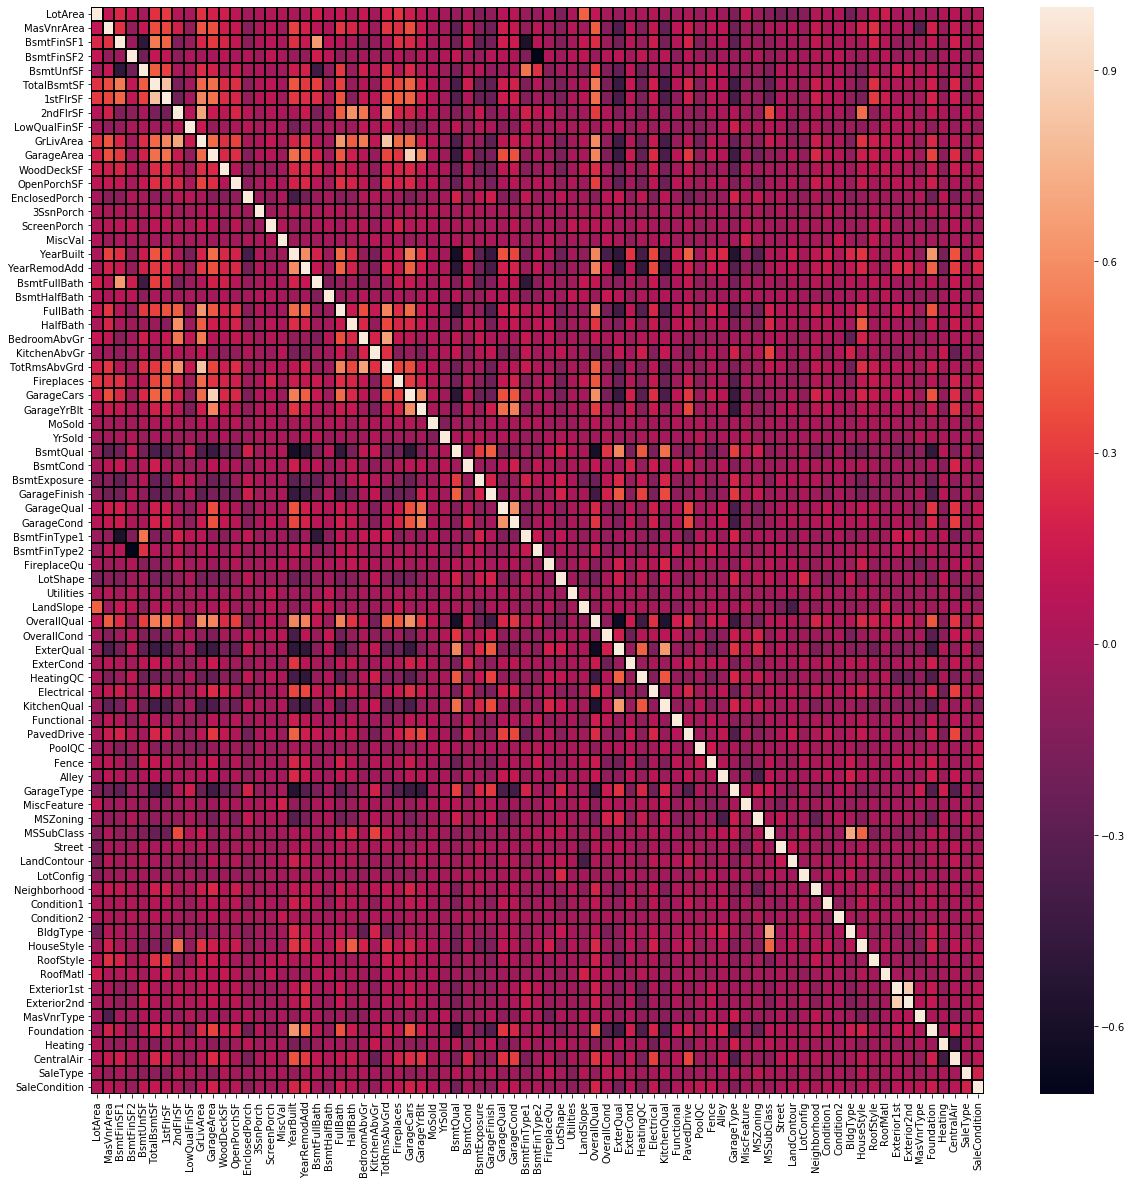

In [23]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_concat.corr(), linewidths=1, linecolor='black')
plt.show()

## Observations:

- GrLivArea, 1stFlrSF, 2ndFlrSF, WoodDeckSF, OpenPorchSF, MasVnrArea, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, LowQualFinSF, GarageArea and  FullBath all describe house area, and out of them GrLivArea has a strong correlation with the target feature, so dropping other two features.

- MSZoning will also be dropped. It has strong correlations to BldgType and HouseStyle, but a weak correlation to the target feature.

- Dropping YearBuilt because features like Foundation and PavedDrive are not similar even though they correlate well with YearBuilt.

In [24]:
features_to_drop = [
    'WoodDeckSF', 'OpenPorchSF', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
    'LowQualFinSF', 'MSZoning', 'GarageCars', 'GarageArea', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd'
]

In [25]:
df_concat = df_concat.drop(features_to_drop, axis=1)

In [26]:
def preprocess(data):
    null_substitute = {
    'MSSubClass' : mode(df.MSSubClass), 'MSZoning' : mode(df.MSZoning), 'LotFrontage' : median(df.LotFrontage),
    'LotArea' : median(df.LotArea),'Street' : mode(df.Street), 'Alley' : -1, 'LotShape' : mode(df.LotShape),
    'LandContour' : mode(df.LandContour), 'Utilities' : mode(df.Utilities), 'LotConfig' : mode(df.LotConfig),
    'LandSlope' : mode(df.LandSlope), 'Neighborhood' : mode(df.Neighborhood), 'Condition1' : mode(df.Condition1),
    'Condition2' : mode(df.Condition2), 'BldgType' : mode(df.BldgType), 'HouseStyle' : mode(df.HouseStyle),
    'OverallQual' : mode(df.OverallQual), 'OverallCond' : mode(df.OverallCond), 'YearBuilt' : 0,
    'YearRemodAdd' : 0, 'RoofStyle' : mode(df.RoofStyle), 'RoofMatl' : mode(df.RoofMatl),
    'Exterior1st' : mode(df.Exterior1st), 'Exterior2nd' : mode(df.Exterior2nd), 'MasVnrType' : mode(df.MasVnrType),
    'MasVnrArea' : median(df.MasVnrArea), 'ExterQual' : mode(df.ExterQual), 'ExterCond' : mode(df.ExterCond),
    'Foundation' : mode(df.Foundation), 'BsmtQual' : -1, 'BsmtCond' : -1, 'BsmtExposure' : -1,
    'BsmtFinType1' : -1, 'BsmtFinSF1' : median(df.BsmtFinSF1), 'BsmtFinType2' : -1, 'BsmtFinSF2' : median(df.BsmtFinSF2),
    'BsmtUnfSF' : median(df.BsmtUnfSF), 'TotalBsmtSF' : median(df.TotalBsmtSF), 'Heating' : mode(df.Heating),
    'HeatingQC' : mode(df.HeatingQC), 'CentralAir' : mode(df.CentralAir), 'Electrical' : mode(df.Electrical),
    '1stFlrSF' : median(df['1stFlrSF']), '2ndFlrSF' : median(df['2ndFlrSF']), 'LowQualFinSF' : median(df.LowQualFinSF),
    'GrLivArea' : median(df.GrLivArea), 'BsmtFullBath' : 0, 'BsmtHalfBath' : 0, 'FullBath' : 0, 'HalfBath' : 0,
    'BedroomAbvGr' : 0, 'KitchenAbvGr' : 0, 'KitchenQual' : mode(df.KitchenQual), 'TotRmsAbvGrd' : 0,
    'Functional' : mode(df.Functional), 'Fireplaces' : 0, 'FireplaceQu' : -1, 'GarageType' : -1, 'GarageYrBlt' : 0,
    'GarageFinish' : -1, 'GarageCars' : 0, 'GarageArea' : median(df.GarageArea), 'GarageQual' : -1,
    'GarageCond' : -1, 'PavedDrive' : mode(df.PavedDrive), 'WoodDeckSF' : median(df.WoodDeckSF),
    'OpenPorchSF' : median(df.OpenPorchSF), 'EnclosedPorch' : median(df.EnclosedPorch),
    '3SsnPorch' : median(df['3SsnPorch']), 'ScreenPorch' : median(df.ScreenPorch),
    'PoolArea' : median(df.PoolArea), 'PoolQC' : -1, 'Fence' : -1, 'MiscFeature' : -1, 'MiscVal' : median(df.MiscVal),
    'MoSold' : 0, 'YrSold' : 0, 'SaleType' : mode(df.SaleType), 'SaleCondition' : mode(df.SaleCondition)
    }
    
    continuous_features = [
    'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
    'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
    'ScreenPorch', 'MiscVal'
    ]
    
    discrete_features = [
    'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
    'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageYrBlt', 'MoSold', 'YrSold'
    ]
    
    nominal_categorical_features = [
    'Alley', 'GarageType', 'MiscFeature', 'MSZoning', 'MSSubClass', 'Street', 'LandContour', 'LotConfig', 
    'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'SaleType', 'SaleCondition'    
    ]
    
    ordinal_categorical_features = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType1', 'BsmtFinType2', 
    'FireplaceQu', 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
    'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'PoolQC', 'Fence'
    ]
    
    features_to_drop = [
    'WoodDeckSF', 'OpenPorchSF', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
    'LowQualFinSF', 'MSZoning', 'GarageCars', 'GarageArea', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd',
    ]
    
    for i in data:
        if data[i].isnull().any():
            if(null_substitute[i] == 0):
                data[i] = data[i].fillna(0).astype(int)
            elif(null_substitute[i] == -1):
                data[i] = data[i].fillna('NA') 
            else:
                data[i] = data[i].fillna(null_substitute[i])
    
    df_continuous = data[continuous_features]
    df_discrete = data[discrete_features]
    
    encoder_nominal = OrdinalEncoder()
    df_nominal = data[nominal_categorical_features]
    df_nominal = pd.DataFrame(encoder_nominal.fit_transform(df_nominal))
    df_nominal.columns = nominal_categorical_features
    
    encoder = OrdinalEncoder()
    df_ordinal = data[ordinal_categorical_features]
    df_ordinal = pd.DataFrame(encoder.fit_transform(df_ordinal))
    df_ordinal.columns = ordinal_categorical_features
    
    df_concat = pd.concat([ 
    df_continuous, 
    df_discrete,
    df_ordinal, 
    df_nominal
    ], axis=1).astype(float)
    
    df_concat = df_concat.drop(features_to_drop, axis=1)
    
    return df_concat
    
    

In [28]:
preprocessed_df = preprocess(df)
preprocessed_df.head()

,LotArea,BsmtFinSF2,GrLivArea,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YearRemodAdd,BsmtFullBath,BsmtHalfBath,...,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,SaleType,SaleCondition
0,8450.0,0.0,1710.0,0.0,0.0,0.0,0.0,2003.0,1.0,0.0,...,1.0,1.0,12.0,13.0,1.0,2.0,1.0,1.0,8.0,4.0
1,9600.0,0.0,1262.0,0.0,0.0,0.0,0.0,1976.0,0.0,1.0,...,1.0,1.0,8.0,8.0,2.0,1.0,1.0,1.0,8.0,4.0
2,11250.0,0.0,1786.0,0.0,0.0,0.0,0.0,2002.0,1.0,0.0,...,1.0,1.0,12.0,13.0,1.0,2.0,1.0,1.0,8.0,4.0
3,9550.0,0.0,1717.0,272.0,0.0,0.0,0.0,1970.0,1.0,0.0,...,1.0,1.0,13.0,15.0,2.0,0.0,1.0,1.0,8.0,0.0
4,14260.0,0.0,2198.0,0.0,0.0,0.0,0.0,2000.0,1.0,0.0,...,1.0,1.0,12.0,13.0,1.0,2.0,1.0,1.0,8.0,4.0


In [29]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_log_error, r2_score

In [30]:
X_features = np.array(preprocessed_df)
labels = df['SalePrice'].astype(float)

In [31]:
def evaluate_model(name, model, X_train, Y_train):            
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2)  
    
    model.fit(x_train, y_train)      
    
    pred_train = model.predict(x_train)
    pred_val = model.predict(x_val)
    
    rmsle = np.sqrt(mean_squared_log_error(y_val, pred_val))
    r2 = r2_score(y_val, pred_val)
    cvs = cross_val_score(model, X_train, Y_train, cv=5)
    
    f, ax = plt.subplots(figsize=(7, 7))
    plt.scatter(y_train, pred_train, label='Training')
    plt.scatter(y_val, pred_val, label='Validation')  
    
    plt.plot([0, 8e5], [0, 8e5], c='red')
    plt.legend()
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.title(name)
    plt.show()   

    metrics = pd.DataFrame(
                            [rmsle, r2, mean(cvs)],
                            index=['RMSLE', 'R^2', 'CV Mean'],
                            columns=[name]
    )
    
    return metrics

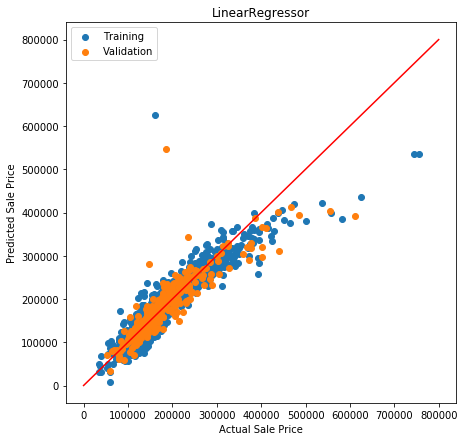

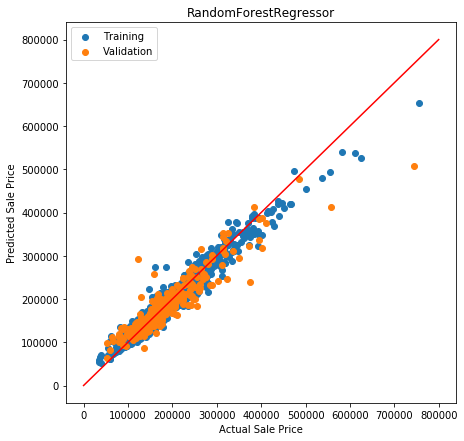

[18:56:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


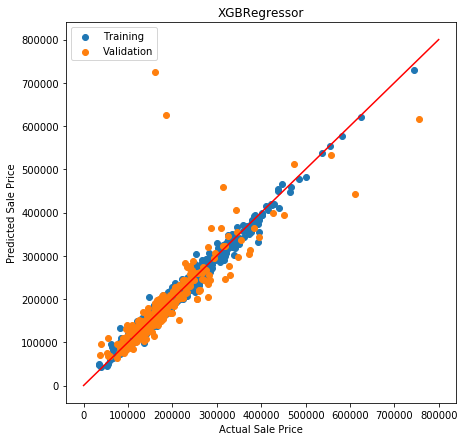

,LinearRegressor,RandomForestRegressor,XGBRegressor
RMSLE,0.163455,0.156634,0.181310
R^2,0.774775,0.851155,0.659892
CV Mean,0.808325,0.822660,0.876752


In [32]:
lr = LinearRegression()
rfr = RandomForestRegressor(max_depth=7, n_estimators=100)
xgb = XGBRegressor(max_depth=3, n_estimators=300, subsample=0.8)

regressors = [lr, rfr, xgb]
model_names = ['LinearRegressor', 'RandomForestRegressor', 'XGBRegressor']
metrics = []

for name, reg in zip(model_names, regressors):
    metrics.append(evaluate_model(name, reg, X_features, labels))

results = pd.concat(metrics, axis=1)    
results

XGBRegressor performing the best.

In [33]:
import pickle

In [34]:
pickle.dump(xgb, open("python/model/model.pkl", "wb"))

In [35]:
reg = pickle.load(open("python/model/model.pkl", "rb"))

[18:57:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [36]:
df_test = pd.read_csv("python/data/test.csv")
preprocessed_test = preprocess(df_test)

In [37]:
preprocessed_test.head()

,LotArea,BsmtFinSF2,GrLivArea,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YearRemodAdd,BsmtFullBath,BsmtHalfBath,...,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,SaleType,SaleCondition
0,11622.0,144.0,896.0,0.0,0.0,120.0,0.0,1961.0,0.0,0.0,...,1.0,0.0,10.0,12.0,2.0,1.0,0.0,1.0,8.0,4.0
1,14267.0,0.0,1329.0,0.0,0.0,0.0,12500.0,1958.0,0.0,0.0,...,3.0,0.0,11.0,13.0,1.0,1.0,0.0,1.0,8.0,4.0
2,13830.0,0.0,1629.0,0.0,0.0,0.0,0.0,1998.0,0.0,0.0,...,1.0,0.0,10.0,12.0,2.0,2.0,0.0,1.0,8.0,4.0
3,9978.0,0.0,1604.0,0.0,0.0,0.0,0.0,1998.0,0.0,0.0,...,1.0,0.0,10.0,12.0,1.0,2.0,0.0,1.0,8.0,4.0
4,5005.0,0.0,1280.0,0.0,0.0,144.0,0.0,1992.0,0.0,0.0,...,1.0,0.0,6.0,6.0,2.0,2.0,0.0,1.0,8.0,4.0


In [38]:
pred_test = reg.predict(np.array(preprocessed_test))

In [39]:
# Create dataframe
df_pred_test = pd.DataFrame(pred_test)
df_pred_test.columns = ['SalePrice']

result = pd.concat([df_test['Id'], df_pred_test.astype(float)], axis=1)
result.head()

,Id,SalePrice
0,1461,133435.750000
1,1462,178210.187500
2,1463,201780.531250
3,1464,192046.765625
4,1465,180107.406250
